In [ ]:
#Esta libreria es fundamental
#pip install pandas-datareader

In [ ]:
#Para graficos, tiene elementos interactivos, parecidos a PBI
#pip install plotly_express

In [ ]:
import warnings
warnings.filterwarnings('ignore')  # Hide warnings
import datetime as dt
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

In [ ]:
import plotly.express as px

In [ ]:
start = dt.datetime(2020, 1, 1)
end = dt.datetime(2021,6,30)

In [ ]:
btc = web.DataReader("BTC-USD", 'yahoo', start, end)  # Recolecta los datos desde Yahoo
btc.reset_index(inplace=True)

Bitcoin
“BTC-USD” significa que los precios de Bitcoin estan en USD.

In [ ]:
#Precio bitcoin
crypto= btc[['Date','Adj Close']]
crypto= crypto.rename(columns = {'Adj Close':'BTC'})

In [ ]:
# Promedio Móvil 7 días
crypto[ 'BTC_7DAY_MA' ] = crypto.BTC.rolling( 7).mean()

In [ ]:
#Ethereum
eth = web.DataReader("ETH-USD", 'yahoo', start, end)  # Collects data
eth.reset_index(inplace=True)
crypto["ETH"]= eth["Adj Close"]

# 7 day moving average
crypto[ 'ETH_7DAY_MA' ] = crypto.ETH.rolling( 7).mean()

In [ ]:
#Litecoin
eth = web.DataReader("LTC-USD", 'yahoo', start, end)  # Collects data
eth.reset_index(inplace=True)
crypto["LTC"]= eth["Adj Close"]
# 7 day moving average
crypto[ 'LTC_7DAY_MA' ] = crypto.ETH.rolling( 7).mean()

In [ ]:
#doge coin
doge = web.DataReader("DOGE-USD", 'yahoo', start, end)  # Collects data
doge.reset_index(inplace=True)
crypto["DOGE"]= doge["Adj Close"]
# 7 day moving average
crypto[ 'DOGE_7DAY_MA' ] = crypto.DOGE.rolling( 7).mean()

In [ ]:
#Obtener las fechas 
crypto.set_index("Date", inplace=True)

In [ ]:
crypto[['BTC','ETH','LTC','DOGE']].tail()

,BTC,ETH,LTC,DOGE
Date,,,,
2021-06-13,40218.476562,2537.891113,172.949097,0.332085
2021-06-14,40406.269531,2610.936768,178.659424,0.328381
2021-06-15,38347.062500,2367.663574,166.458939,0.307761
2021-06-16,38053.503906,2372.001953,167.055695,0.306496
2021-06-18,35365.984375,2159.684326,153.111374,0.281435


,BTC,ETH,LTC,DOGE
Date,,,,
2021-06-13,40218.476562,2537.891113,172.949097,0.332085
2021-06-14,40406.269531,2610.936768,178.659424,0.328381
2021-06-15,38347.062500,2367.663574,166.458939,0.307761
2021-06-16,38053.503906,2372.001953,167.055695,0.306496
2021-06-18,35365.984375,2159.684326,153.111374,0.281435


In [ ]:
#Generar tabla y enviarla a salida excel.Sirve para utilizarla en PBI
df=crypto
#display(df) #en pantalla
df.to_excel('PortafolioCryto.xlsx',sheet_name='Portafolio')


In [ ]:
#Correlacion entre los datos
crypto[['BTC','ETH','LTC','DOGE']].corr()

,BTC,ETH,LTC,DOGE
BTC,1.000000,0.895467,0.949588,0.600115
ETH,0.895467,1.000000,0.954629,0.869485
LTC,0.949588,0.954629,1.000000,0.765913
DOGE,0.600115,0.869485,0.765913,1.000000


,BTC,ETH,LTC,DOGE
BTC,1.000000,0.895467,0.949588,0.600115
ETH,0.895467,1.000000,0.954629,0.869485
LTC,0.949588,0.954629,1.000000,0.765913
DOGE,0.600115,0.869485,0.765913,1.000000


<AxesSubplot:>

<AxesSubplot:>

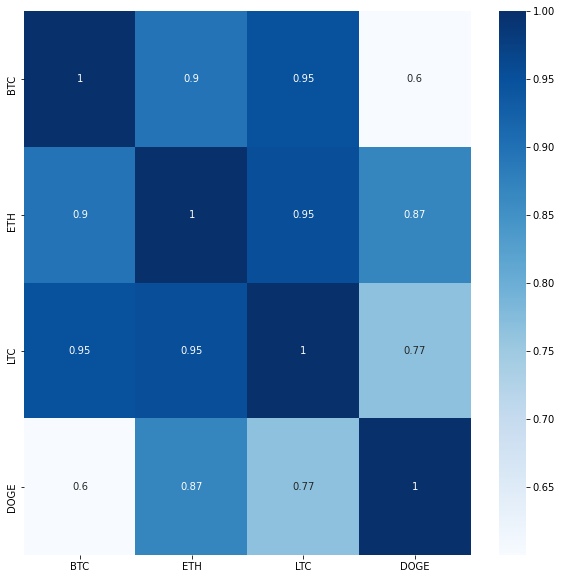

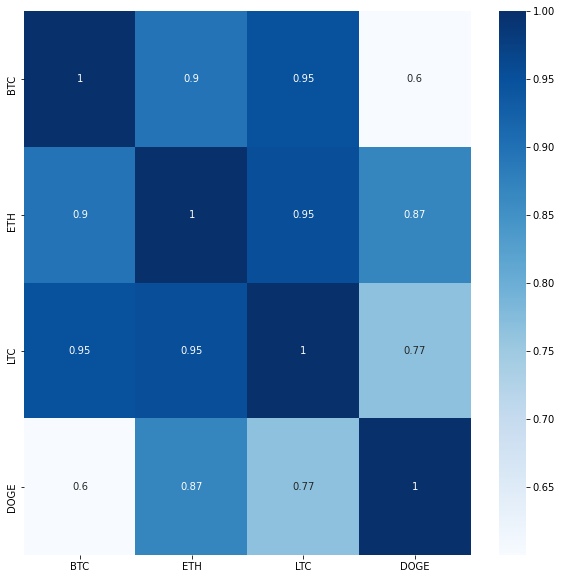

In [ ]:
#heatmap
plt.figure(figsize = (10,10))
sns.heatmap(crypto[['BTC','ETH','LTC','DOGE']].corr(),annot=True, cmap='Blues')

In [ ]:
#Ploteo de los datos con Ploty Express período determinado
fig = px.line(crypto, y=["BTC",'ETH','LTC','DOGE'] )
fig.show()

In [ ]:
#DOGE, este es caso que subio por los comentarios de Musk y SpaceX
fig = px.line(crypto, y=['DOGE'] )
fig.show()

Medias Móviles
¿Qué son las medias móviles?
Los promedios móviles generalmente se muestran como una línea en un gráfico, que muestra la media de un conjunto anterior de períodos. Debido a que son la media (o promedio) de los datos, ayudan a mostrar la tendencia general sin los movimientos de precios más extremos (o "ruido") que ocurren en el camino. Por ejemplo, si una acción o un activo criptográfico aumenta repentinamente y se retira rápidamente a donde comenzó, esto no se mostrará en un promedio móvil como lo haría en el gráfico de precios normal.

In [ ]:
#Moving Average values
fig = px.line(crypto, y=['BTC_7DAY_MA'] )
fig.show()

In [ ]:
#Moving Average values
fig = px.line(crypto, y=['LTC_7DAY_MA'] )
fig.show()

In [ ]:
#Moving Average values
fig = px.line(crypto, y=['DOGE_7DAY_MA'] )
fig.show()

In [ ]:
#Moving Average values
fig = px.line(crypto, y=['ETH_7DAY_MA'] )
fig.show()